In [2]:
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import time
import getpass
import os

In [ ]:
password = getpass.getpass()
command = "sudo -S apt install traceroute" #can be any command but don't forget -S as it enables input from stdin
os.system('echo %s | %s' % (password, command))

In [4]:
!traceroute google.com

traceroute to google.com (172.217.14.110), 30 hops max, 60 byte packets
 1  Circle.mshome.net (172.19.240.1)  1.001 ms  0.982 ms  0.861 ms
 2  192.168.0.1 (192.168.0.1)  1.158 ms  1.129 ms  1.124 ms
 3  syn-142-254-184-077.inf.spectrum.com (142.254.184.77)  11.509 ms  11.506 ms  10.114 ms
 4  lag-62.sndhcaiw01h.netops.charter.com (76.167.17.73)  34.278 ms  34.274 ms  33.609 ms
 5  lag-28.sndhcaax01r.netops.charter.com (72.129.2.118)  13.614 ms  13.606 ms  13.602 ms
 6  lag-22.rcr01lsancarc.netops.charter.com (72.129.1.0)  12.556 ms  11.511 ms  17.240 ms
 7  tge9-1.crlscaij03h.socal.rr.com (72.129.1.105)  17.831 ms syn-072-129-001-191.inf.spectrum.com (72.129.1.191)  17.200 ms tge9-1.crlscaij03h.socal.rr.com (72.129.1.105)  17.824 ms
 8  * * 108.170.226.21 (108.170.226.21)  13.251 ms
 9  142.251.79.38 (142.251.79.38)  18.260 ms 209.85.249.94 (209.85.249.94)  21.788 ms 74.125.252.75 (74.125.252.75)  21.783 ms
10  142.250.208.114 (142.250.208.114)  31.116 ms lax31s01-in-f14.1e100.net (172

In [5]:
ip_addresses = ["142.254.184.77", "76.167.17.73", "72.129.2.118"]
request_count = 1000
csv_file = 'ping_results.csv'

In [6]:
# Function to ping an IP address and return the latency
def ping(ip):
    try:
        output = subprocess.run(["ping", "-c", "1", ip], capture_output=True, text=True, timeout=2)
        if "time=" in output.stdout:
            latency = output.stdout.split("time=")[1].split(" ms")[0]
            return float(latency)
        else:
            return None
    except subprocess.TimeoutExpired:
        return None

In [7]:
df = pd.DataFrame(columns=['Request Number', f'{ip_addresses[0]} Latency (ms)', f'{ip_addresses[1]} Latency (ms)', f'{ip_addresses[2]} Latency (ms)'])

# ping 1000 times
for i in range(1, request_count + 1):
    row = [i]
    for ip in ip_addresses:
        latency = ping(ip)
        row.append(latency if latency is not None else None)  # Use None for timeouts
    df.loc[i - 1] = row
    print(f"Request {i} completed.")
    time.sleep(0.1)

# Save df to CSV
df.to_csv(csv_file, index=False)
print(f"Results saved to {csv_file}")

Request 1 completed.
Request 2 completed.
Request 3 completed.
Request 4 completed.
Request 5 completed.
Request 6 completed.
Request 7 completed.
Request 8 completed.
Request 9 completed.
Request 10 completed.
Request 11 completed.
Request 12 completed.
Request 13 completed.
Request 14 completed.
Request 15 completed.
Request 16 completed.
Request 17 completed.
Request 18 completed.
Request 19 completed.
Request 20 completed.
Request 21 completed.
Request 22 completed.
Request 23 completed.
Request 24 completed.
Request 25 completed.
Request 26 completed.
Request 27 completed.
Request 28 completed.
Request 29 completed.
Request 30 completed.
Request 31 completed.
Request 32 completed.
Request 33 completed.
Request 34 completed.
Request 35 completed.
Request 36 completed.
Request 37 completed.
Request 38 completed.
Request 39 completed.
Request 40 completed.
Request 41 completed.
Request 42 completed.
Request 43 completed.
Request 44 completed.
Request 45 completed.
Request 46 complete

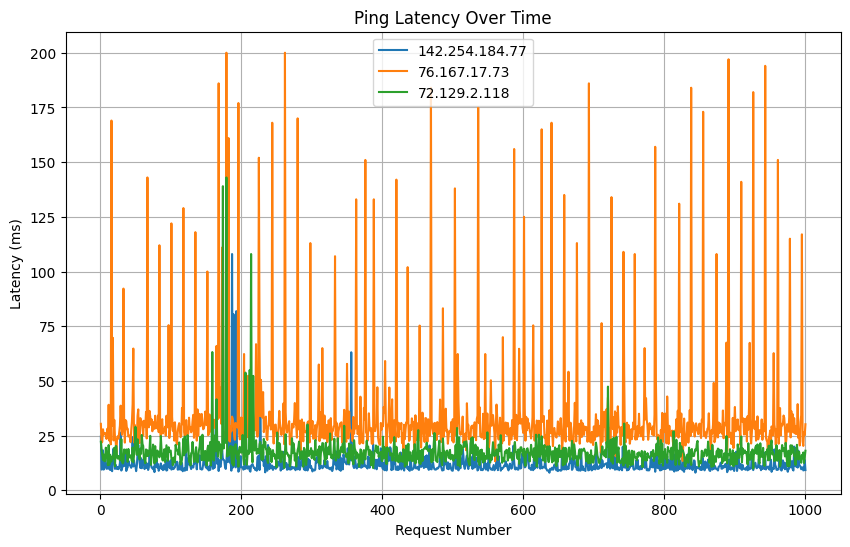

In [8]:
plt.figure(figsize=(10, 6))

# PLot latencies for each IP address
for ip in ip_addresses:
    plt.plot(df['Request Number'], df[f'{ip} Latency (ms)'], label=f'{ip}')

plt.title('Ping Latency Over Time')
plt.xlabel('Request Number')
plt.ylabel('Latency (ms)')
plt.legend()
plt.grid(True)
plt.show()

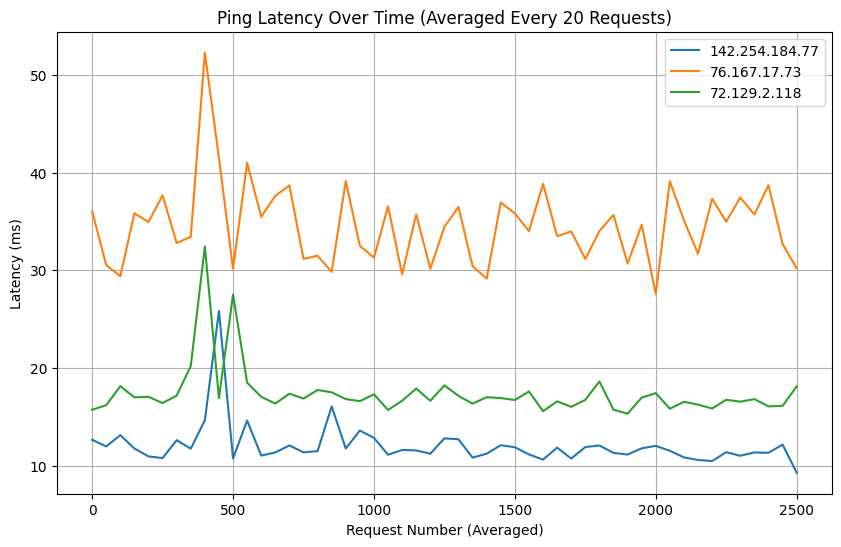

In [10]:
# Group the DataFrame by chunks of 50 requests and calculate the mean latency for each group
df_avg = df.groupby(df['Request Number'] // 20).mean()

# Plot the results
plt.figure(figsize=(10, 6))

# Plot averaged latencies for each IP address
for ip in ip_addresses:
    plt.plot(df_avg.index * 50, df_avg[f'{ip} Latency (ms)'], label=f'{ip}')

plt.title('Ping Latency Over Time (Averaged Every 20 Requests)')
plt.xlabel('Request Number (Averaged)')
plt.ylabel('Latency (ms)')
plt.legend()
plt.grid(True)
plt.show()
